# Curso: Aprendizaje Automático
# Tarea3 - Algoritmos de Machine Learning
## Alonso Nuñez Sanchez
## Fecha de entrega: 12 agosto 2019

Este notebook tiene como objetivo implementar distintos algoritmos de aprendizaje automático.

Con el dataset elegido se usarán métodos de clasificación vistos en clase, y una breve investigación sobre los métodos de ensamble, y la aplicación de uno de ellos para comparar los resultados

### Importar dependencias, y cargar el dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =  pd.read_csv('https://raw.githubusercontent.com/anunezcr/datasets/master/clientes_diarios_clasif.csv')

### Revisar el tamañao del data set y ver algunas instancias:

In [2]:
print("tamaño:",data.shape)
data.head(5)

tamaño: (22633, 14)


,id_tienda,tipo_tienda,provincia,supervisor,mes_del_anio,semana_del_anio,es_quincena,es_feriado,dia_de_la_semana,horas_operacion,pos_en_uso,clientes_totales,clientes_vip,volumen
0,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,Anio Nuevo,Lunes,11,4,210,23.0,medio
1,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Martes,11,4,306,17.0,alto
2,12,FS,SAN JOSE,2015622_080,1,1,VERDADERO,NO,Miercoles,11,4,203,12.0,medio
3,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Jueves,11,4,192,13.0,medio
4,12,FS,SAN JOSE,2015622_080,1,1,FALSO,NO,Viernes,12,4,229,16.0,medio


### Elegir qué columnas usar:

In [3]:
#Version1, usar 6 features:
#cols_to_use = ['provincia', 'mes_del_anio', 'es_quincena','dia_de_la_semana','horas_operacion','pos_en_uso','volumen']

#Versión2, usar 4 features (Version1 - 2 features de menor relevancia):
#cols_to_use = ['provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','volumen']

#Versión3, usar 6 features (Version2 + 2 nuevos feautures)
cols_to_use = ['tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda','volumen']

data = data[cols_to_use]

# Inicia Pre-Procesado

### Convertir features categóricos en numéricos

In [4]:
data['provincia'] = data['provincia'].replace({'SAN JOSE' : 1,'ALAJUELA' : 2,'CARTAGO' : 3,'HEREDIA' : 4,'LIMON' : 5,'GUANACASTE' : 6,'PUNTARENAS' : 7})
data['dia_de_la_semana'] = data['dia_de_la_semana'].replace({'Lunes' : 1,'Martes' : 2,'Miercoles' : 3,'Jueves' : 4,'Viernes' : 5,'Sabado' : 6,'Domingo' : 7})
data['volumen'] = data['volumen'].replace({'alto' : 1,'medio' : 2,'bajo' : 3})
data['tipo_tienda'] = data['tipo_tienda'].replace({'FS' : 1,'IS' : 2,'Mall' : 3})

#comentar la siguiente linea si se usan 4 features en lugar de 6
#data['es_quincena'] = data['es_quincena'].replace({' VERDADERO ' : 1,' FALSO ' : 0})

### Revisar cómo quedó después de eliminar los categóricos:

In [5]:
print("tamaño:",data.shape)
data.head(5)

tamaño: (22633, 7)


,tipo_tienda,provincia,dia_de_la_semana,horas_operacion,pos_en_uso,id_tienda,volumen
0,1,1,1,11,4,12,2
1,1,1,2,11,4,12,1
2,1,1,3,11,4,12,2
3,1,1,4,11,4,12,2
4,1,1,5,12,4,12,2


### Convertir zeros en NaN y borrar NaNs

In [6]:
print ("shape antes: ", data.shape)
data = data.replace(0,np.NaN) 
#data.isnull().values.any()   #preguntar si hay NaN
data = data.dropna()
print ("\nshape después: ", data.shape)

shape antes:  (22633, 7)

shape después:  (21794, 7)


# Inicia el trabajo con los modelos elegidos, que serán:
   **DecisionTree**

   **RandomForest**

   **SVC**

   **GradientBoosting (método de ensamble elegido después de probar varios)**


Después de varias pruebas se definieron 3 versiones de features elegidos, obteniendo los mejores resultados con la version 3:

**Version1:** features = data[['provincia', 'mes_del_anio', 'es_quincena','dia_de_la_semana','horas_operacion','pos_en_uso']]

**Version2:** features = data[['provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso']]

**Version3:** features = data[['tipo_tienda','provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda']]





### Importar librerías varias para manejo de modelos

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score

Determinar cuáles columnas son features y cuáles labels.

En este caso las clases están dadas por "volumen" que indica si es un día alto volumen (cantidad de clientes), medio o bajo

In [8]:
#Version1: usar 6 features:
#features = data[['provincia', 'mes_del_anio', 'es_quincena','dia_de_la_semana','horas_operacion','pos_en_uso']]

#Version2: usar 4 features (quitando 2 de menor relevancia):
#features = data[['provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso']]

#Version3: usar 6 features (Version2 + 2 nuevos):
features = data[['tipo_tienda','provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda']]


labels = data['volumen']

Separa set de entrenamiento y set de pruebas
Con una proporción 75% - 25%

In [9]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state = 13) 

In [10]:
print ("shape del dataset completo: ", data.shape)
print ("\nshape del set de entrenamiento: ", X_train.shape)
print ("\nshape del set de pruebas: ", y_test.shape)

shape del dataset completo:  (21794, 7)

shape del set de entrenamiento:  (16345, 6)

shape del set de pruebas:  (5449,)


## Modelo clasificador usando algoritmo DecisionTree

In [11]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 13)

#entrenamiento
DecisionTreeModel.fit(X_train, y_train)

#prediccion (usar datos de test)
y_predict = DecisionTreeModel.predict(X_test)

print("Accuracy para DecisionTree: {:.4f}".format(accuracy_score(y_test, y_predict)))

Accuracy para DecisionTree: 0.8954


Después de probar varios valores para max_depth y features, la combinación con mejores resultados es:
    
    6 Features: 'tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda'
    min_samples_leaf=11, max_depth = None

## Modelo clasificador usando algoritmo RandomForest

In [12]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3, min_samples_split=18, n_estimators=700, max_depth = None, random_state = 10)

#entrenamiento
RandomForestModel.fit(X_train, y_train)

#prediccion (usar datos de test)
y_predict = RandomForestModel.predict(X_test)

print("Accuracy para Random Forest:     {:.4f}".format(accuracy_score(y_test, y_predict)))

Accuracy para Random Forest:     0.8981


Después de probar varios valores para los hiperparámetros, la combinación que dio los mejores resultados fue:

    6 Features: 'tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda'
    min_samples_leaf=3, min_samples_split=18, n_estimators=700, max_depth = None    

## Modelo clasificador usando algoritmo SVC

In [13]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy para training con SVC: {:.4f}".format(svc.score(X_train, y_train)))
print("Accuracy para test con SVC:     {:.4f}".format(svc.score(X_test, y_test)))

Accuracy para training con SVC: 0.9139
Accuracy para test con SVC:     0.8961


Después de probar varios valores para los hiperparámetros, la combinación que dio los mejores resultados fue:

    6 Features: 'tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda'
    C= no definirlo (default), gamma = 'auto'. Distintos valores de C y gamma no cambiaban el resultado

## Modelo clasificador usando algoritmo de ensamble GradientBoosting

In [18]:
GradientBoostingModel = GradientBoostingClassifier(learning_rate=0.6, max_depth=4, max_leaf_nodes=15)

#entrenamiento
GradientBoostingModel.fit(X_train, y_train)

#prediccion (usar datos de test)
y_predict = GradientBoostingModel.predict(X_test)

print("Accuracy para GradientBoosting:     {:.4f}".format(accuracy_score(y_test, y_predict)))


Accuracy para GradientBoosting:     0.9002


Después de probar varios valores para los hiperparámetros, la combinación que dio los mejores resultados fue:

    6 Features: 'tipo_tienda', 'provincia', 'dia_de_la_semana','horas_operacion','pos_en_uso','id_tienda'
    learning_rate=0.6, max_depth=4, max_leaf_nodes=15.

### Con los 3 primeros métodos utilizados los resultados fueron similares. Podríamos decir que Random Forest tuvo el mejor score pero por muy poco (89.81% vrs 89.61 de SVC)

### Con el método de emsamble GradientBoosting mejoró levemente, llegando a 90.02%

### Mejores resultados para DecisionTree

Método | Features | Profundidad Max | Resultado | Mejores resultados
------------ | ------------- | ------------- | ------------- | ------------- 
DT | v1 | 5 | 79.44% | 
DT | v1 | 8 | 81.32% | ** mejor en v1
DT | v1 | 10 | 81.21% | 
DT | v1 | 20 | 78.52% | 
-- | -- | -- | -- | 
DT | v2 | 8 | 81.20% | 
DT | v2 | 10 | 82.38% | 
DT | v2 | 20 | 82.54% | ** mejor en v2
-- | -- | -- | -- | 
DT | v3 | 8 | 87.97% | 
DT | v3 | 10 | 89.13% | 
DT | v3 | 13 | 89.58% | ** mejor en v3
DT | v3 | 15 | 89.31% | 
DT | v3 | 20 | 86.26% | 

### Mejores resultados para RandomForest

Método | Features | Leaf | Split | Estimators | Profundidad Max | Resultado  | Mejores resultados
------------ | ------------- | ------------- | -------------  | -------------  | -------------  | -------------  | ------------- 
RF | v1 | 10 | 10 | 600 | None | 81.37% |
-- | -- | -- | -- |  -- |  -- |  -- |
RF | v2 | 3 | 20 | 1000 | None | 82.41% |
RF | v2 | 10 | 20 | 1000 | None | 82.51% |
RF | v2 | 10 | 10 | 600 | None | 82.51% | ** mejor en v2
-- | -- | -- | -- |  -- |  -- |  -- |
RF | v3 | 3 | 10 | 600 | None | 89.68% | 
RF | v3 | 3 | 18 | 600 | None | 89.79% | 
RF | v3 | 3 | 18 | 700 | None | 89.81% | ** mejor en v3
RF | v3 | 10 | 10 | 600 | None | 89.41% |



### Mejores resultados para SVC

Método | Features | C | Gamma | Resultado | Mejores resultados
------------ | ------------- | ------------- | ------------- | -------------  | ------------- 
SVC | v3 | N/D | Auto  | 89.61% | 

### Mejores resultados para GradientBoosting

Método | Features | max_depth | max_leaf_nodes | learning_rate | ResultadoResultado | Mejores resultados
------------ | ------------- | ------------- | ------------- | -------------  | -------------   | ------------- 
GB | v3 | 4 | 15 | 0.6 |90.02% | 


## Mostrar los features de mayor relevancia

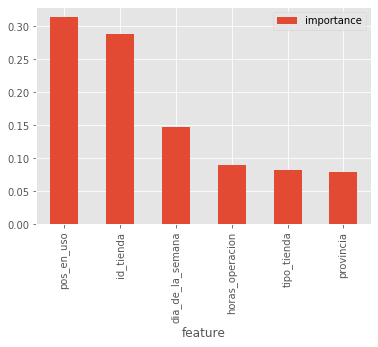

In [15]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance': RandomForestModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(9)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
importances.plot.bar()

# Métodos de ensamble

Los métodos de ensamble buscan mejorar los resultados de los métodos "convencionales".
Básicamente consiste en usar varios modelos de aprendizaje y así mejorar el resultado combinando varios métodos, mejor que lo que se podría obtener con cada uno individualmente

En general se conocen como método de ensamble a aquel que usa varios métodos de la misma familia, y Sistema de Aprendizaje Multiple al que usa métodos diferentes entre sí

Algunos métodos:

### Agregación Bootstrap

Este método, también conocido como Bagging.
Se suele usar con algoritmos de árbol, pero se pueden aplicar par cualquier familia

Consiste en tomar un conjunto de entrenamiento de tamaño n, y generar m subconjuntos de tamaño n' .
Con esto se obtienen m modelos de aprendizaje indivuales.
El resultado final de la combinación se obtiene por votación (en caso de clasificación) 
o por la media de las m respuestas (en caso de regresión)

### Boosting

Este método trabaja siempre con el mismo se de datos de entrenamiento (no lo divide como Bootstrap) iterando varias veces.
En cada iteración modifica los pesos de los objetos mal clasificados.
Modificando los pesos de los objetos mal clasificados, se busca que en la siguiente iteración tengan mayor importancia y por lo tanto sea más probable clasficarlos bien